

*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import all necessary libraries.



In [2]:
# load/import all required library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

# start writing your code here
df = pd.read_csv('/content/drive/MyDrive/Python/Sleep_health_and_lifestyle_dataset.csv')

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [5]:
# write task-2 solution

# start writing your code here
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

print("Missing values before cleaning:\n", df.isnull().sum())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Nothing')
print("Missing values after cleaning1:\n", df.isnull().sum())

for column in df.columns:
  if df[column].isnull().any():
    if df[column].dtype == 'object':
      mode_value = df[column].mode()[0]
      df[column].fillna(mode_value, inplace=True)
    else:
      mean_value = df[column].mean()
      df[column].fillna(mean_value, inplace=True)
print("Missing values after cleaning2:\n", df.isnull().sum())



Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

outliers = df[(df['Age'] > outlier_threshold_upper) | (df['Age'] < outlier_threshold_lower)]
if not outliers.empty:
  print("\nOutliers detected in 'Age' column:")
  print(outliers)
else:
  print("\nNo outliers detected in 'Age' using IQR method.")

median_age = df['Age'].median()
df.loc[(df['Age'] > outlier_threshold_upper) | (df['Age'] < outlier_threshold_lower), 'Age'] = median_age

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

outliers = df[(df['Age'] > outlier_threshold_upper) | (df['Age'] < outlier_threshold_lower)]

if not outliers.empty:
  print("\nOutliers detected in 'Age' column:")
  print(outliers)
else:
  print("\nNo outliers detected in 'Age' using IQR method.")


0
0
Missing values before cleaning:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
Missing values after cleaning1:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
Missing values after cleaning2:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
S

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

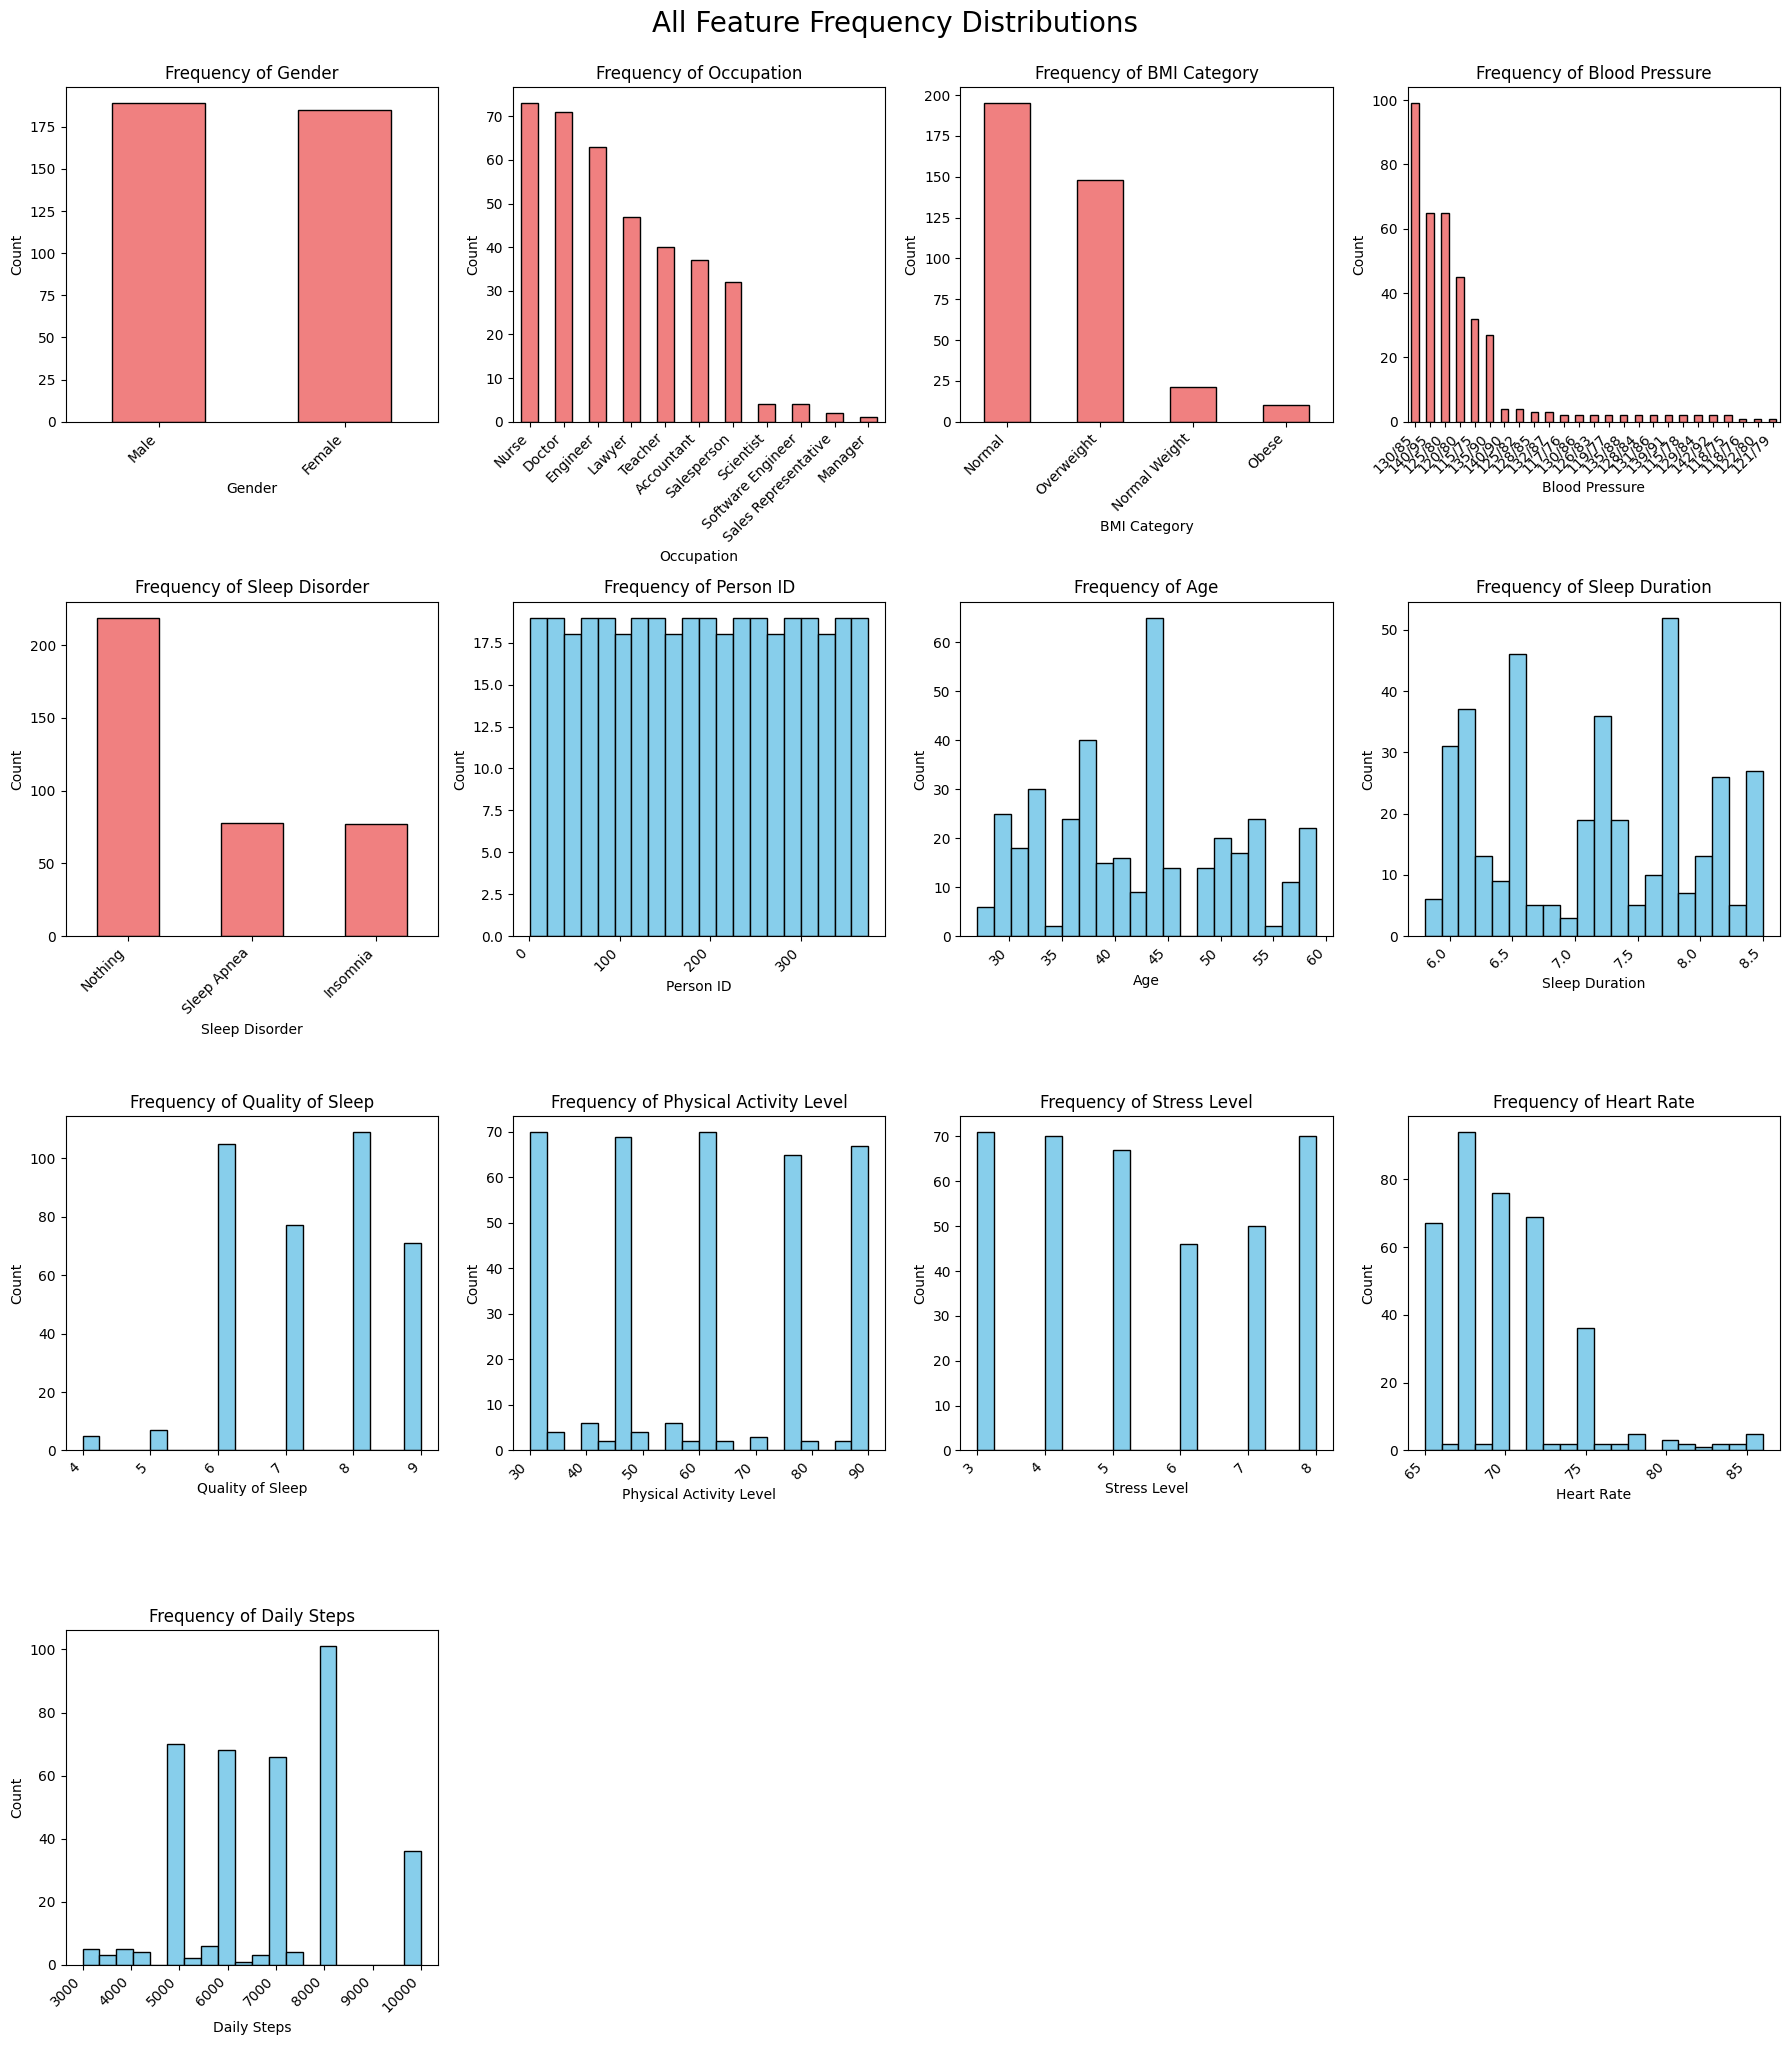

In [6]:
# write task-3 solution

# start writing your code here

cat_features = df.select_dtypes(include=['object']).columns
num_features = df.select_dtypes(exclude=['object']).columns
all_features = list(cat_features) + list(num_features)

n_features = len(all_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, column in enumerate(all_features, 1):
    plt.subplot(n_rows, n_cols, i)
    if column in cat_features:
        df[column].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    else:
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle('All Feature Frequency Distributions', fontsize=20, y=1.02)
plt.show()


\•	**Task 4:** Perform scaling on the features of the dataset. Remember that you will need to apply data conversion before scaling if required.

In [7]:
# write task-4 solution

# start writing your code here
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop('Blood Pressure', axis=1)
print(df.head())

print(df['Occupation'].unique())

gender_mapping = {'Male': 0, 'Female': 1}
occupation_mapping = {
    'Software Engineer': 0, 'Teacher': 1, 'Nurse': 2, 'Doctor': 3, 'Sales Executive': 4,
    'Engineer': 5, 'Scientist': 6, 'Lawyer': 7, 'Sales Representative': 8, 'Manager': 9,
    'Accountant': 10, 'Salesperson': 11
}
bmi_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2, 'Normal Weight': 0}
sleep_disorder_mapping = {'Nothing': 0, 'Insomnia': 1, 'Sleep Apnea': 2}

df['Gender'] = df['Gender'].map(gender_mapping)
df['Occupation'] = df['Occupation'].map(occupation_mapping)
df['BMI Category'] = df['BMI Category'].map(bmi_mapping)
df['Sleep Disorder'] = df['Sleep Disorder'].map(sleep_disorder_mapping)

print(df.head())


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Sleep Disorder', errors='ignore')
scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nDataFrame after scaling numerical features (excluding Sleep Disorder):")
print(df.head())




   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                     42.0             6   Overweight   
1                 6                     60.0             8       Normal   
2                 6                     60.0             8       Normal   
3                 4                     30.0             8        Obese   
4                 4                     30.0             8        Obese   

   Heart Rate  Daily Steps Sleep Disorder  Systolic  Diastolic  
0          77         4200        Nothing       126         83  
1          75        1

•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use the value 3217 as the value of the random_state parameter of this function.

In [8]:
# write task-5 solution

# start writing your code here
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3217)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (299, 13) (299,)
Testing set shape (X_test, y_test): (75, 13) (75,)


•	**Task 6:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [9]:
# write task-6 solution

# start writing your code here
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

print("Naïve Bayes model is trained.")

Naïve Bayes model is trained.


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[36  2  1]
 [ 3 14  3]
 [ 3  2 11]]


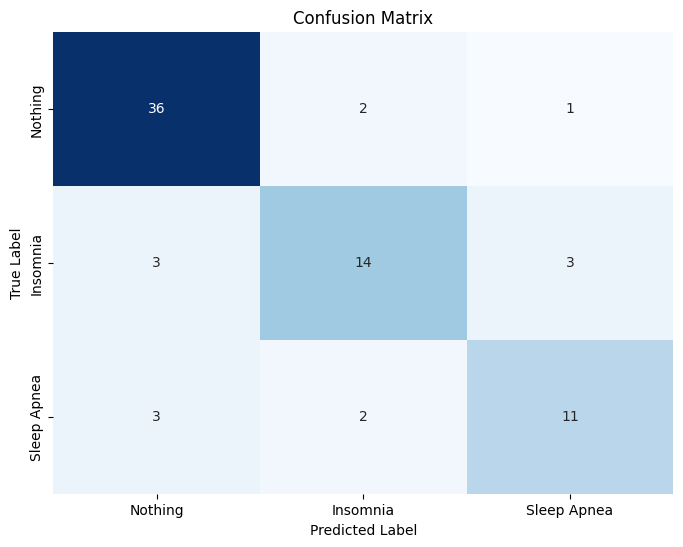

In [10]:
# write task-7 solution

# start writing your code here
y_pred = nb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Nothing', 'Insomnia', 'Sleep Apnea'],
            yticklabels=['Nothing', 'Insomnia', 'Sleep Apnea'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


•	**Taks 8:** Calculate your model's train and test accuracy and compare them.

In [11]:
# write task-8 solution

# start writing your code here

y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
  print("\nThe model has higher accuracy on training compared to the test")
elif test_accuracy > train_accuracy:
  print("\nThe model has higher accuracy on testing compared to training")
else:
  print("\nThe model has equal accuracy on both training and test")


Training Accuracy: 0.9097
Testing Accuracy: 0.8133

The model has higher accuracy on training compared to the test


•	**Taks 9:** Show how 10-fold cross-validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [12]:
# write task-9 solution

# start writing your code here
n_splits = 10

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
nb_model_cv = GaussianNB()

cv_scores = cross_val_score(nb_model_cv, X, y, cv=kf, scoring='accuracy')

print(f"Accuracy for each fold ({n_splits}-fold cross-validation):")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.4f}")

mean_accuracy = cv_scores.mean()
print(f"\nMean Accuracy: {mean_accuracy:.4f}")

Accuracy for each fold (10-fold cross-validation):
Fold 1: 0.9474
Fold 2: 0.7368
Fold 3: 0.9211
Fold 4: 0.7895
Fold 5: 0.7568
Fold 6: 0.9189
Fold 7: 0.9459
Fold 8: 0.9730
Fold 9: 0.8108
Fold 10: 0.9189

Mean Accuracy: 0.8719
